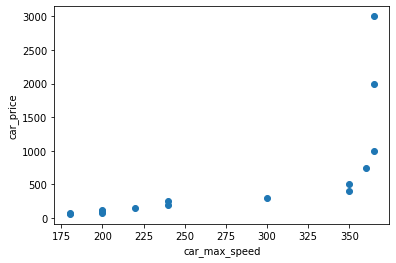

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("polynomial-regression.csv",sep = ";") #df değişkenine dataset atandı.

x = df.car_max_speed.values.reshape(-1,1) #speed sütunu tek satır olarak alındı.
y = df.car_price.values.reshape(-1,1)     #values sütunu tek satır olarak alındı.

plt.scatter(x,y)             #x ve y eksenlerine az önce tanımladığımız sütunlar atandı.
plt.xlabel("car_max_speed")  #x ekseninin ismi verildi.
plt.ylabel("car_price")      #y ekseninin ismi verildi.
plt.show()                   #çizdirildi.

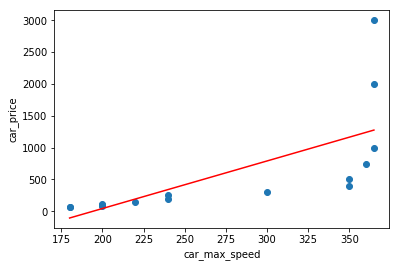

10 million TL car speed estimation:  [[73243.64746599]]


In [ ]:
# linear regression =  y = b0 + b1*x
# multiple linear regression   y = b0 + b1*x1 + b2*x2

# %% linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()  #linearregression fonksiyonu lr değişenine atandı

lr.fit(x,y)              #lr değişkeni fit edildi.

#%% predict
y_head = lr.predict(x) #tahmin edilir ve y_head değişkenine atanır.

plt.scatter(x,y)
plt.xlabel("car_max_speed")
plt.ylabel("car_price")

plt.plot(x,y_head,color="red",label ="linear")
plt.show()

print("10 million TL car speed estimation: ",lr.predict([[10000]]))

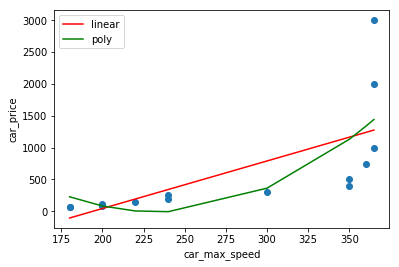

In [ ]:
# %%
# polynomial regression =  y = b0 + b1*x +b2*x^2 + b3*x^3 + ... + bn*x^n

from sklearn.preprocessing import PolynomialFeatures
polynomial_regression = PolynomialFeatures(degree = 2) #degree 2'de x^2'ye geliriz, şekil de x^2'nin çizimine benzer.

x_polynomial = polynomial_regression.fit_transform(x)  #x değişkeni polynomial regresyon için dönüştürülür.


# %% fit
linear_regression2 = LinearRegression() #linear regresyon değişkene atanır.
linear_regression2.fit(x_polynomial,y)  #fit edilir.

# %%

y_head2 = linear_regression2.predict(x_polynomial) #polynomial olarak tahmin edilir ve o y_head2 değişkenine atanır.

plt.scatter(x,y)
plt.xlabel("car_max_speed")
plt.ylabel("car_price")
plt.plot(x,y_head,color="red",label ="linear")

plt.plot(x,y_head2,color= "green",label = "poly")
plt.legend()
plt.show()



In [ ]:
#%%
from sklearn.metrics import r2_score  #noktaların doğruya uzaklıklarını hesaplıyoruz,uzaklığın en az olduğu fonksiyon doğrusunu oluşturur.

print("r_square score for linear regression: ", r2_score(y,y_head))

print("r_square score for polynomial regression: ", r2_score(y,y_head2))


r_square score for linear regression:  0.4745823761330056
r_square score for polynomial regression:  0.5540532844839927
